# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data\\emp_automovel.csv')

In [3]:
df.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [4]:
X = df.drop('inadimplente', axis=1)
y = df['inadimplente']

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

1.0

In [7]:
print(f'Acurácia: {modelo.score(X,y)}')

Acurácia: 1.0


### Validando o modelo

Avaliar os modelo com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em dados independentes.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo.

No intuito de checar a generalização de um modelo, devemos separar o conjunto de dados em 3 partes: dados de treinamento, validação e teste.

- o conjunto de treinamento é utilizado para treinar os modelos. Os modelos vão entender o padrão dos dados a partir desse conjunto de dados.

- o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

- o conjunto de teste fica separado dos demais desde o momento inicial para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

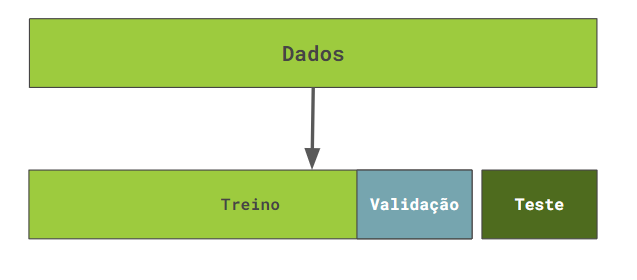

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

In [23]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
print(f'Acurácia de treino: {modelo.score(X_train, y_train)}')
print(f'Acurácia de validacao: {modelo.score(X_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validacao: 0.8494033620764742


In [30]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'Acurácia de treino: {modelo.score(X_train, y_train)}')
print(f'Acurácia de validacao: {modelo.score(X_val, y_val)}')

Acurácia de treino: 0.9206445993031359
Acurácia de validacao: 0.9055831373573731


### Modelo com Random Forest

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
'''

### Avaliando o modelo

In [ ]:
'''modelo = RandomForestClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'Acurácia de treino: {modelo.score(X_train, y_train)}')
print(f'Acurácia de validacao: {modelo.score(X_val, y_val)}')
'''

Acurácia de treino: 0.9153600464576074
Acurácia de validacao: 0.9128995732079087


In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
y_previsto = modelo.predict(X_val)
matrix_confusao = confusion_matrix(y_val, y_previsto)
print(matrix_confusao)

[[10355   124]
 [  960    42]]


In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

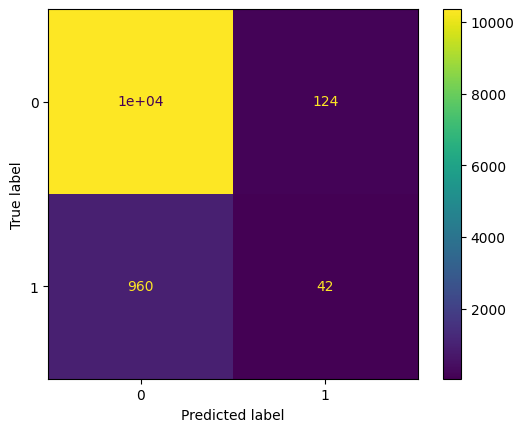

In [34]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matrix_confusao)
visualizacao.plot();

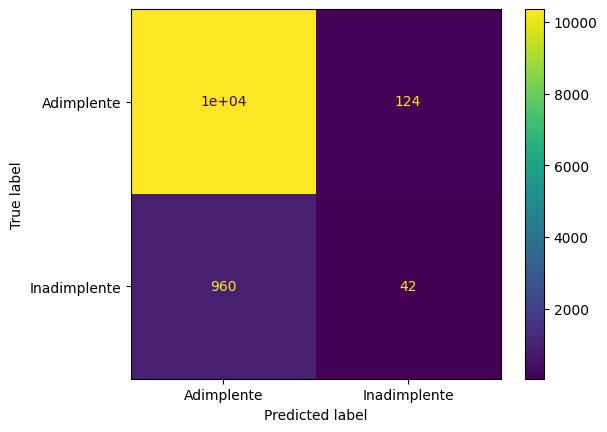

In [35]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matrix_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

## <font color='dark'>Métricas de avaliação</h1>

### Acurácia, precisão e recall

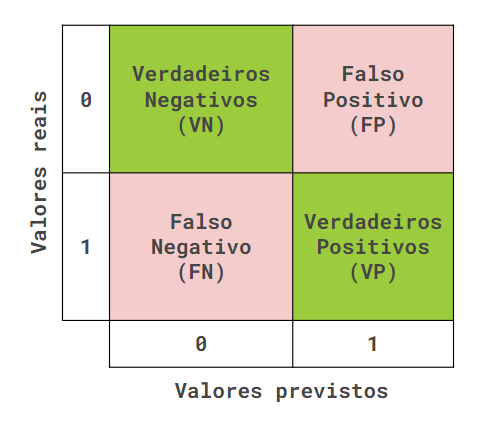

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9055831373573731


In [38]:
from sklearn.metrics import precision_score, recall_score

In [39]:
print(f'Precisao: {precision_score(y_val, y_previsto)}')
print(f'Recal: {recall_score(y_val, y_previsto)}')

Precisao: 0.25301204819277107
Recal: 0.041916167664670656


In [40]:
from sklearn.metrics import f1_score

In [41]:
print(f'F1_score: {f1_score(y_val, y_previsto)}')

F1_score: 0.07191780821917808


### Curva ROC

In [42]:
from sklearn.metrics import RocCurveDisplay

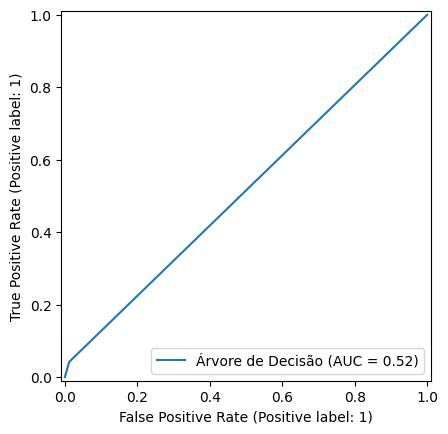

In [43]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Árvore de Decisão')

In [44]:
from sklearn.metrics import roc_auc_score

In [45]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5150414887373835


### Curva de precisão x recall

In [46]:
from sklearn.metrics import PrecisionRecallDisplay

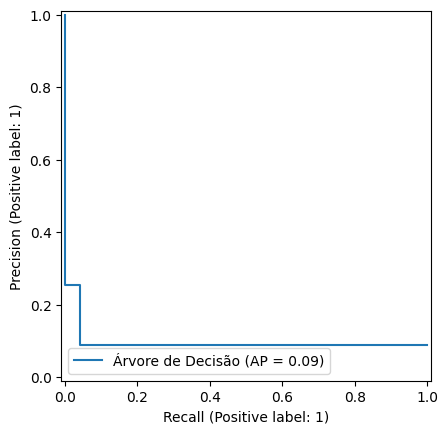

In [47]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Árvore de Decisão')

In [48]:
from sklearn.metrics import average_precision_score

In [49]:
print(f'AC: {average_precision_score(y_val, y_previsto)}')

AC: 0.09422170515363755


### Relatório de métricas

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'>Validação cruzada</h1>

### Usando o KFold

A validação do modelo de classificação a partir da separação dos dados em conjunto de treino e validação faz com que o resultado seja muito dependente dessa divisão dos dados e pode ser que, de forma aleatória, o padrão dos dados de validação sejam diferentes do padrão dos dados de treinamento, levando a sorte de ter um resultado muito melhor do que a realidade ou o azar de um resultado muito pior do que a realidade.

Levando isso em consideração, é possível utilizar a **validação cruzada**, uma estratégia mais consistente e bem mais utilizada nos projetos de machine learning.

Na validação cruzada, ao invés de separarmos os dados em apenas treino e validação uma única vez, dividimos os dados em várias partes de mesmo tamanho. Em cada uma dessas divisões, será utilizada uma parte para validação e todas as outras para treinamento e o processo se repete até que todas as partes sejam utilizadas para validação e o restante para treinamento.

Será gerado um modelo para cada uma dessas divisões e a avaliação de desempenho será feita tirando a média da métrica de cada modelo. Isso faz com que a dependência da separação dos dados seja eliminada, já que há uma variação maior da escolha dos dados e é retirada uma média.

Geralmente são utilizadas 5 ou 10 partes, mais do que isso não é tão necessário porque necessita de um processamento maior e valores menores já mitiga o problema da escolha dos dados.

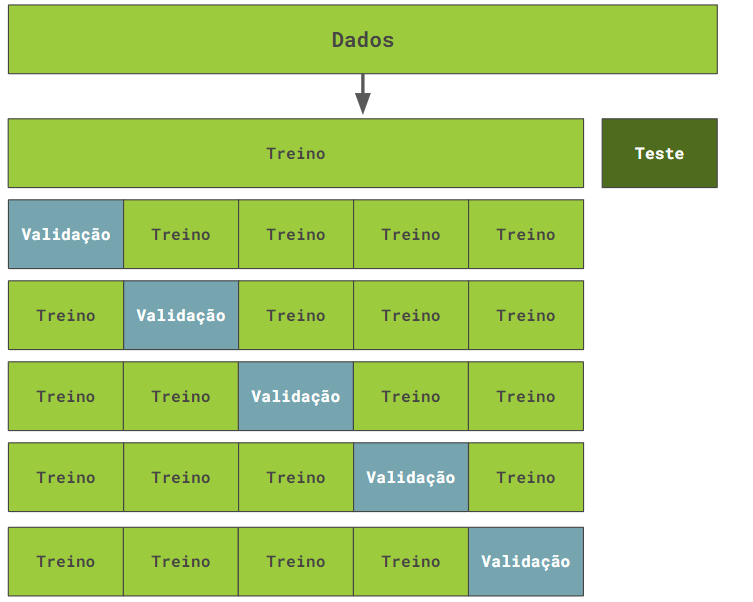

### Validação cruzada com recall

### Estratificando os dados

## <font color='dark'>Balanceamento de dados</h1>

### Oversampling

### Pipeline para validação

Undersampling

### Testando o modelo